# External modules

In [1]:
library(tidyverse)
library("DataExplorer")
library(DescTools)
library(Hmisc)
library("scatterplot3d")
library(plotly)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘Hmisc’


The following objects are masked from ‘package:DescTools’:

    %nin%, Label, Mean, Quantile


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are 

In [2]:
options(repr.plot.width=19, repr.plot.height=12)

# Internal modules

In [3]:
path <- ".."

xfun::in_dir(dir = path, expr = source("./src/impute_outliers.R"))

# Data

In [4]:
source <- "./06_experimentation_2/final_dataset.csv"

In [5]:
data <- xfun::in_dir(dir = path, expr = read.csv(file = source, sep = ","))

In [6]:
str(data)

'data.frame':	21452 obs. of  59 variables:
 $ timestamp             : int  316278166 316311548 316378139 316411240 316444763 316477898 316511375 316544922 316612187 316644571 ...
 $ latitude              : num  48.8 48.8 48.8 48.8 48.8 ...
 $ longitude             : num  2.47 2.47 2.47 2.47 2.47 ...
 $ velocity_latitude     : num  -1.22e-11 -1.56e-11 -1.12e-11 -1.09e-11 -1.39e-11 ...
 $ velocity_longitude    : num  6.17e-11 8.17e-11 6.14e-11 6.17e-11 8.12e-11 ...
 $ velocity              : num  6.29e-11 8.32e-11 6.24e-11 6.27e-11 8.24e-11 ...
 $ lateral_error         : num  -0.169 -0.139 -0.17 -0.178 -0.176 ...
 $ longitudinal_error    : num  -0.446 -0.452 -0.443 -0.438 -0.439 ...
 $ haversine_error       : num  0.476 0.473 0.474 0.472 0.472 ...
 $ latitude_error        : num  -3.56e-06 -3.59e-06 -3.58e-06 -3.42e-06 -3.55e-06 ...
 $ longitude_error       : num  -3.20e-06 -3.47e-06 -3.10e-06 -3.83e-06 -3.10e-06 ...
 $ heading_error         : num  0.304 0.235 0.273 0.14 0.305 ...
 $ late

# Outlier detection

In [7]:
coefficient_iqr <- 9
method <- c("interpolate", "mode", "median", "mean")[1]

## lateral_error_abs

In [8]:
data_lateral_error_abs_object <- impute_outliers(x = data$lateral_error_abs, 
                                             coefficient_iqr = coefficient_iqr, 
                                             method = method)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [9]:
print(names(data_lateral_error_abs_object))

[1] "outlier_values"      "outlier_positions"   "outlier_substitutes"
[4] "method"              "coefficient_iqr"     "imputed_data"       
[7] "raw_data"           


In [10]:
print(data_lateral_error_abs_object$outlier_positions)

  [1]  2299  2300  2301  2302  2303  2304  2305  2306  2307  2308  2309  2310
 [13]  2311  2312  2313  2314  2315  2316  2317  2318  2319  2320  2321  2322
 [25]  2323  2324  2325  2326  2327  2328  2329  2330  2331  2332  2333  2334
 [37]  2335  2336  2337  2338  2339  2340  2341  2342  2343  2344  2345  2346
 [49]  2347  2348  2349  2350  2351  2352  2353  2354  2355  2356  2357  2358
 [61]  2359  2360  2361  2362  2363  2364  2365  2366  2367  2368  2369  2622
 [73]  2623  2624  2625  2626  2627  2628  2629  2630  2631  2632  2633  2634
 [85]  2635  2636  2637  2638  2639  2640  2641  2642  2643  2644  2645  2646
 [97]  2647  2648  2649  2650  2651  2652  3364  3365  3366  3367  3368  3369
[109]  3370  3371  3372  3373  3374  3375  3376  3377  3378 15398 15399 15400
[121] 15401 15402 15403 15404 15405 15406 15407 15408 15409 15410 15411 15412
[133] 15413 15414 15415 15416 15417 15418 15419 15420 15421 15422 15423 15424
[145] 15425 15426 15427 15428 15429 15430 15431 15432 15433 1543

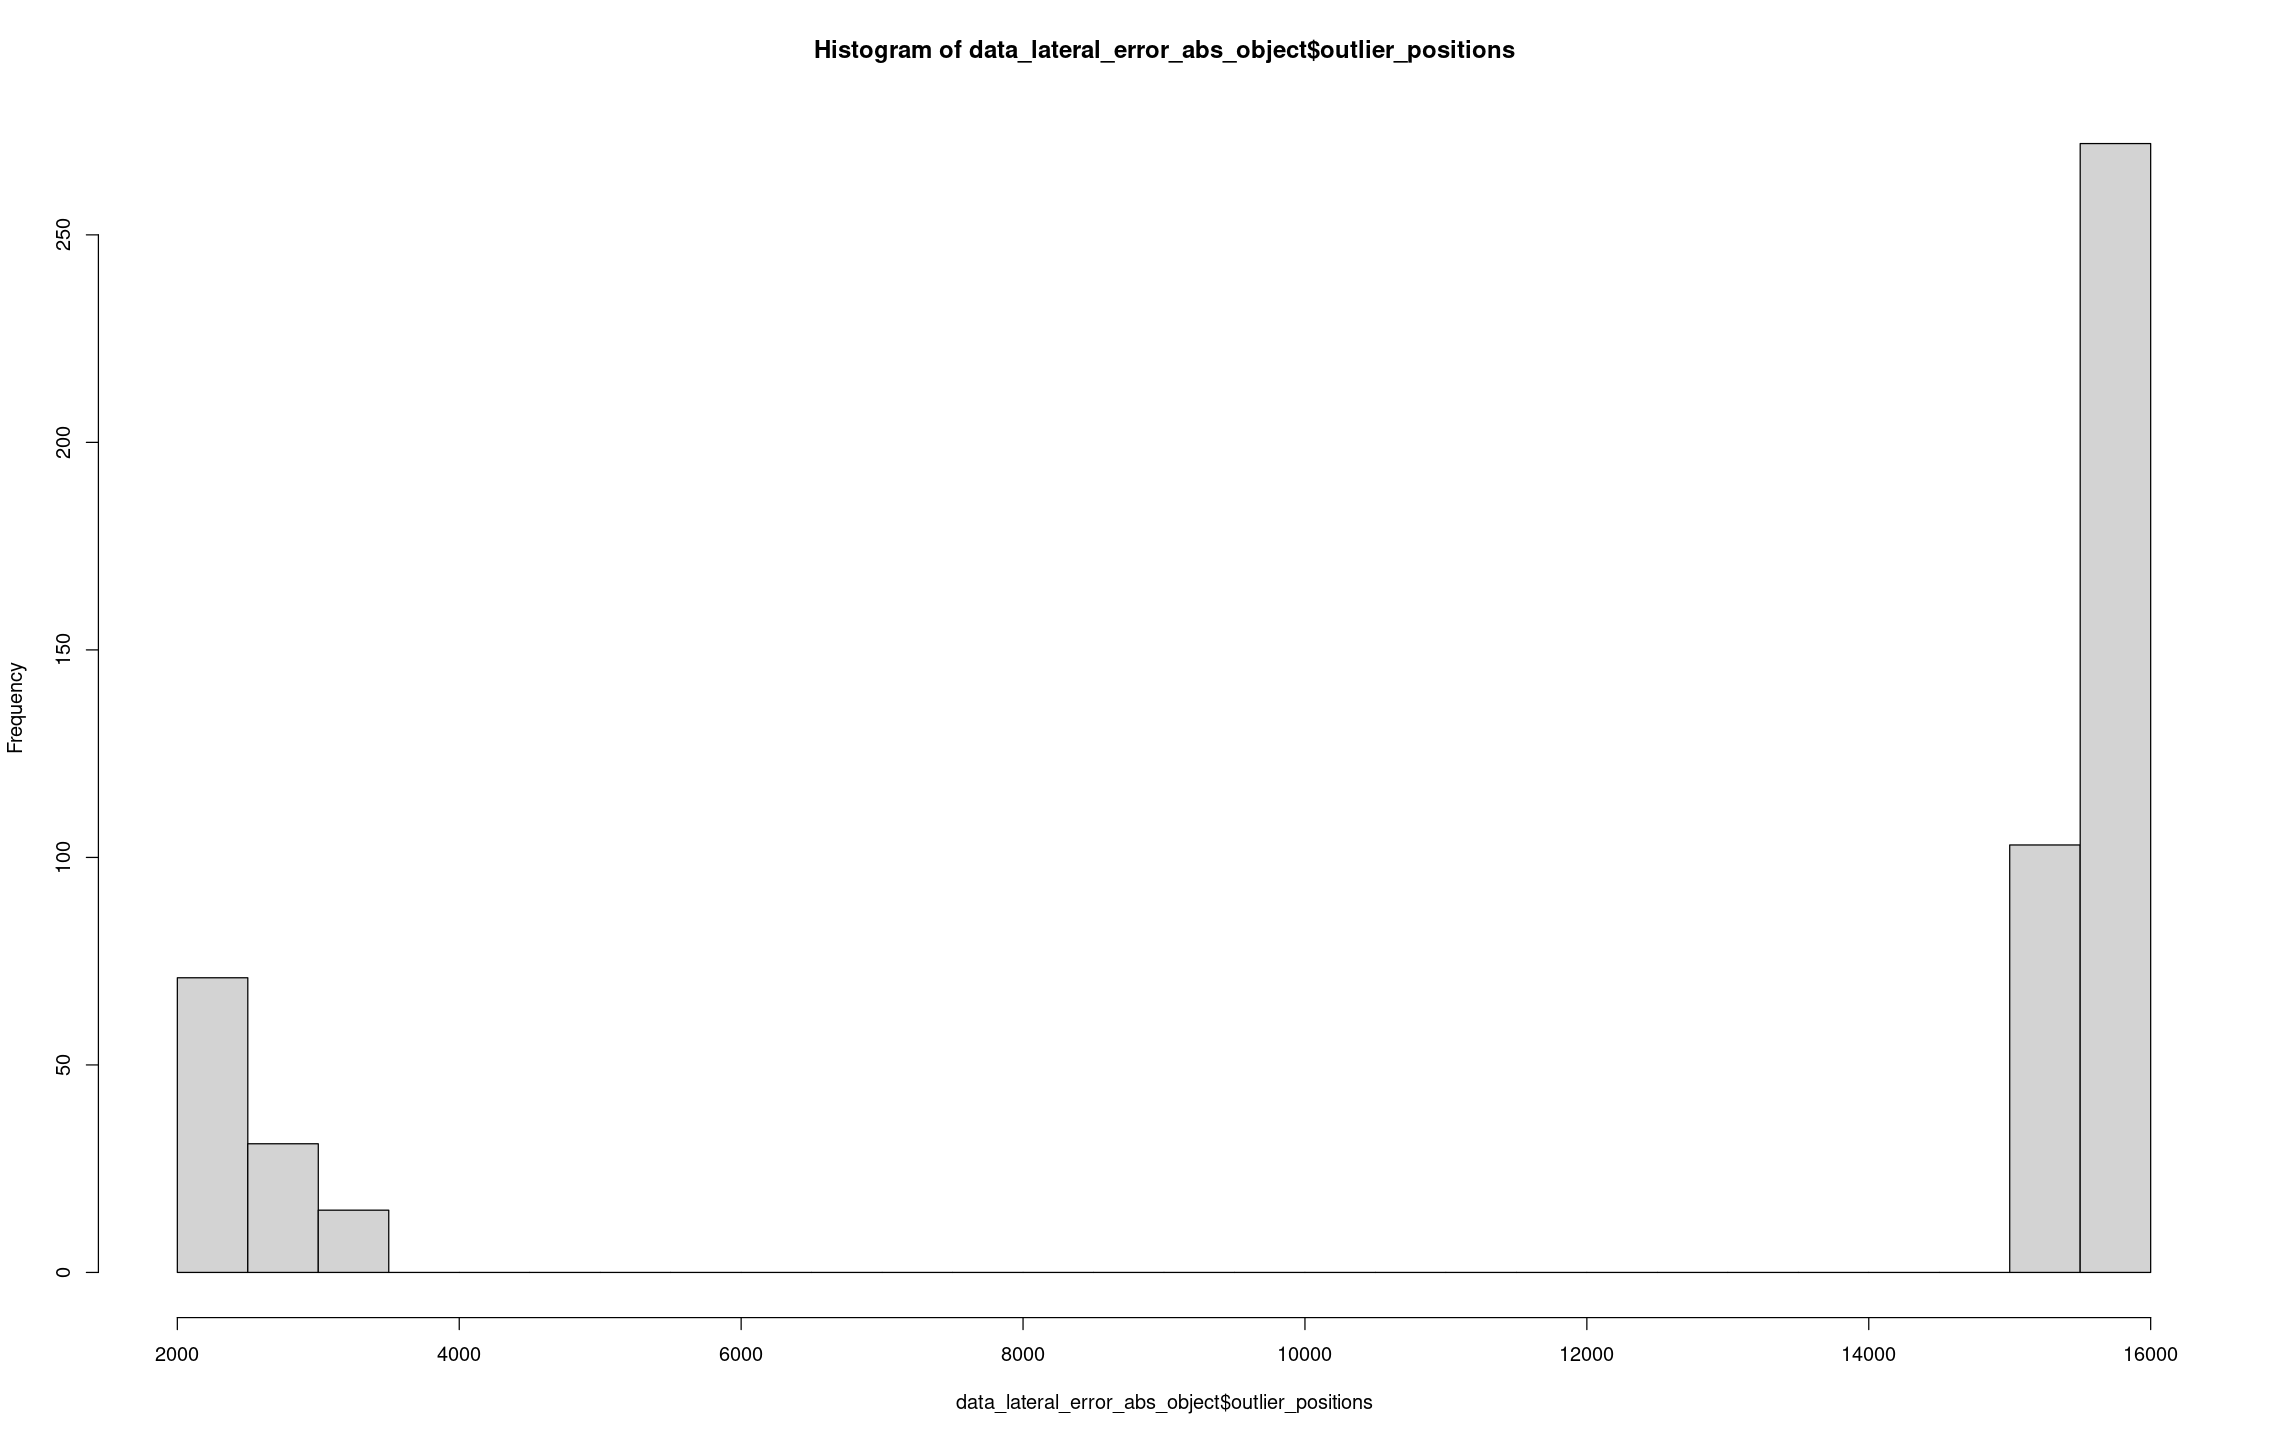

In [11]:
hist(data_lateral_error_abs_object$outlier_positions, nclass = 20)

------------------------------------------------------------------------------ 
data_lateral_error_abs_object$imputed_data (numeric)

        length             n           NAs        unique            0s'
        21'452        21'452             0        20'803             0
                      100.0%          0.0%                        0.0%
                                                                      
           .05           .10           .25        median           .75
  0.0245297992  0.0475101501  0.1158896163  0.2515075505  0.5026936978
                                                                      
         range            sd         vcoef           mad           IQR
  3.9598087918  0.5933541336  1.4081406261  0.2324148830  0.3868040815
                                                                      
          mean         meanCI
  0.4213742027   0.4134336145
                 0.4293147909
                             
           .90            .95
  0.7

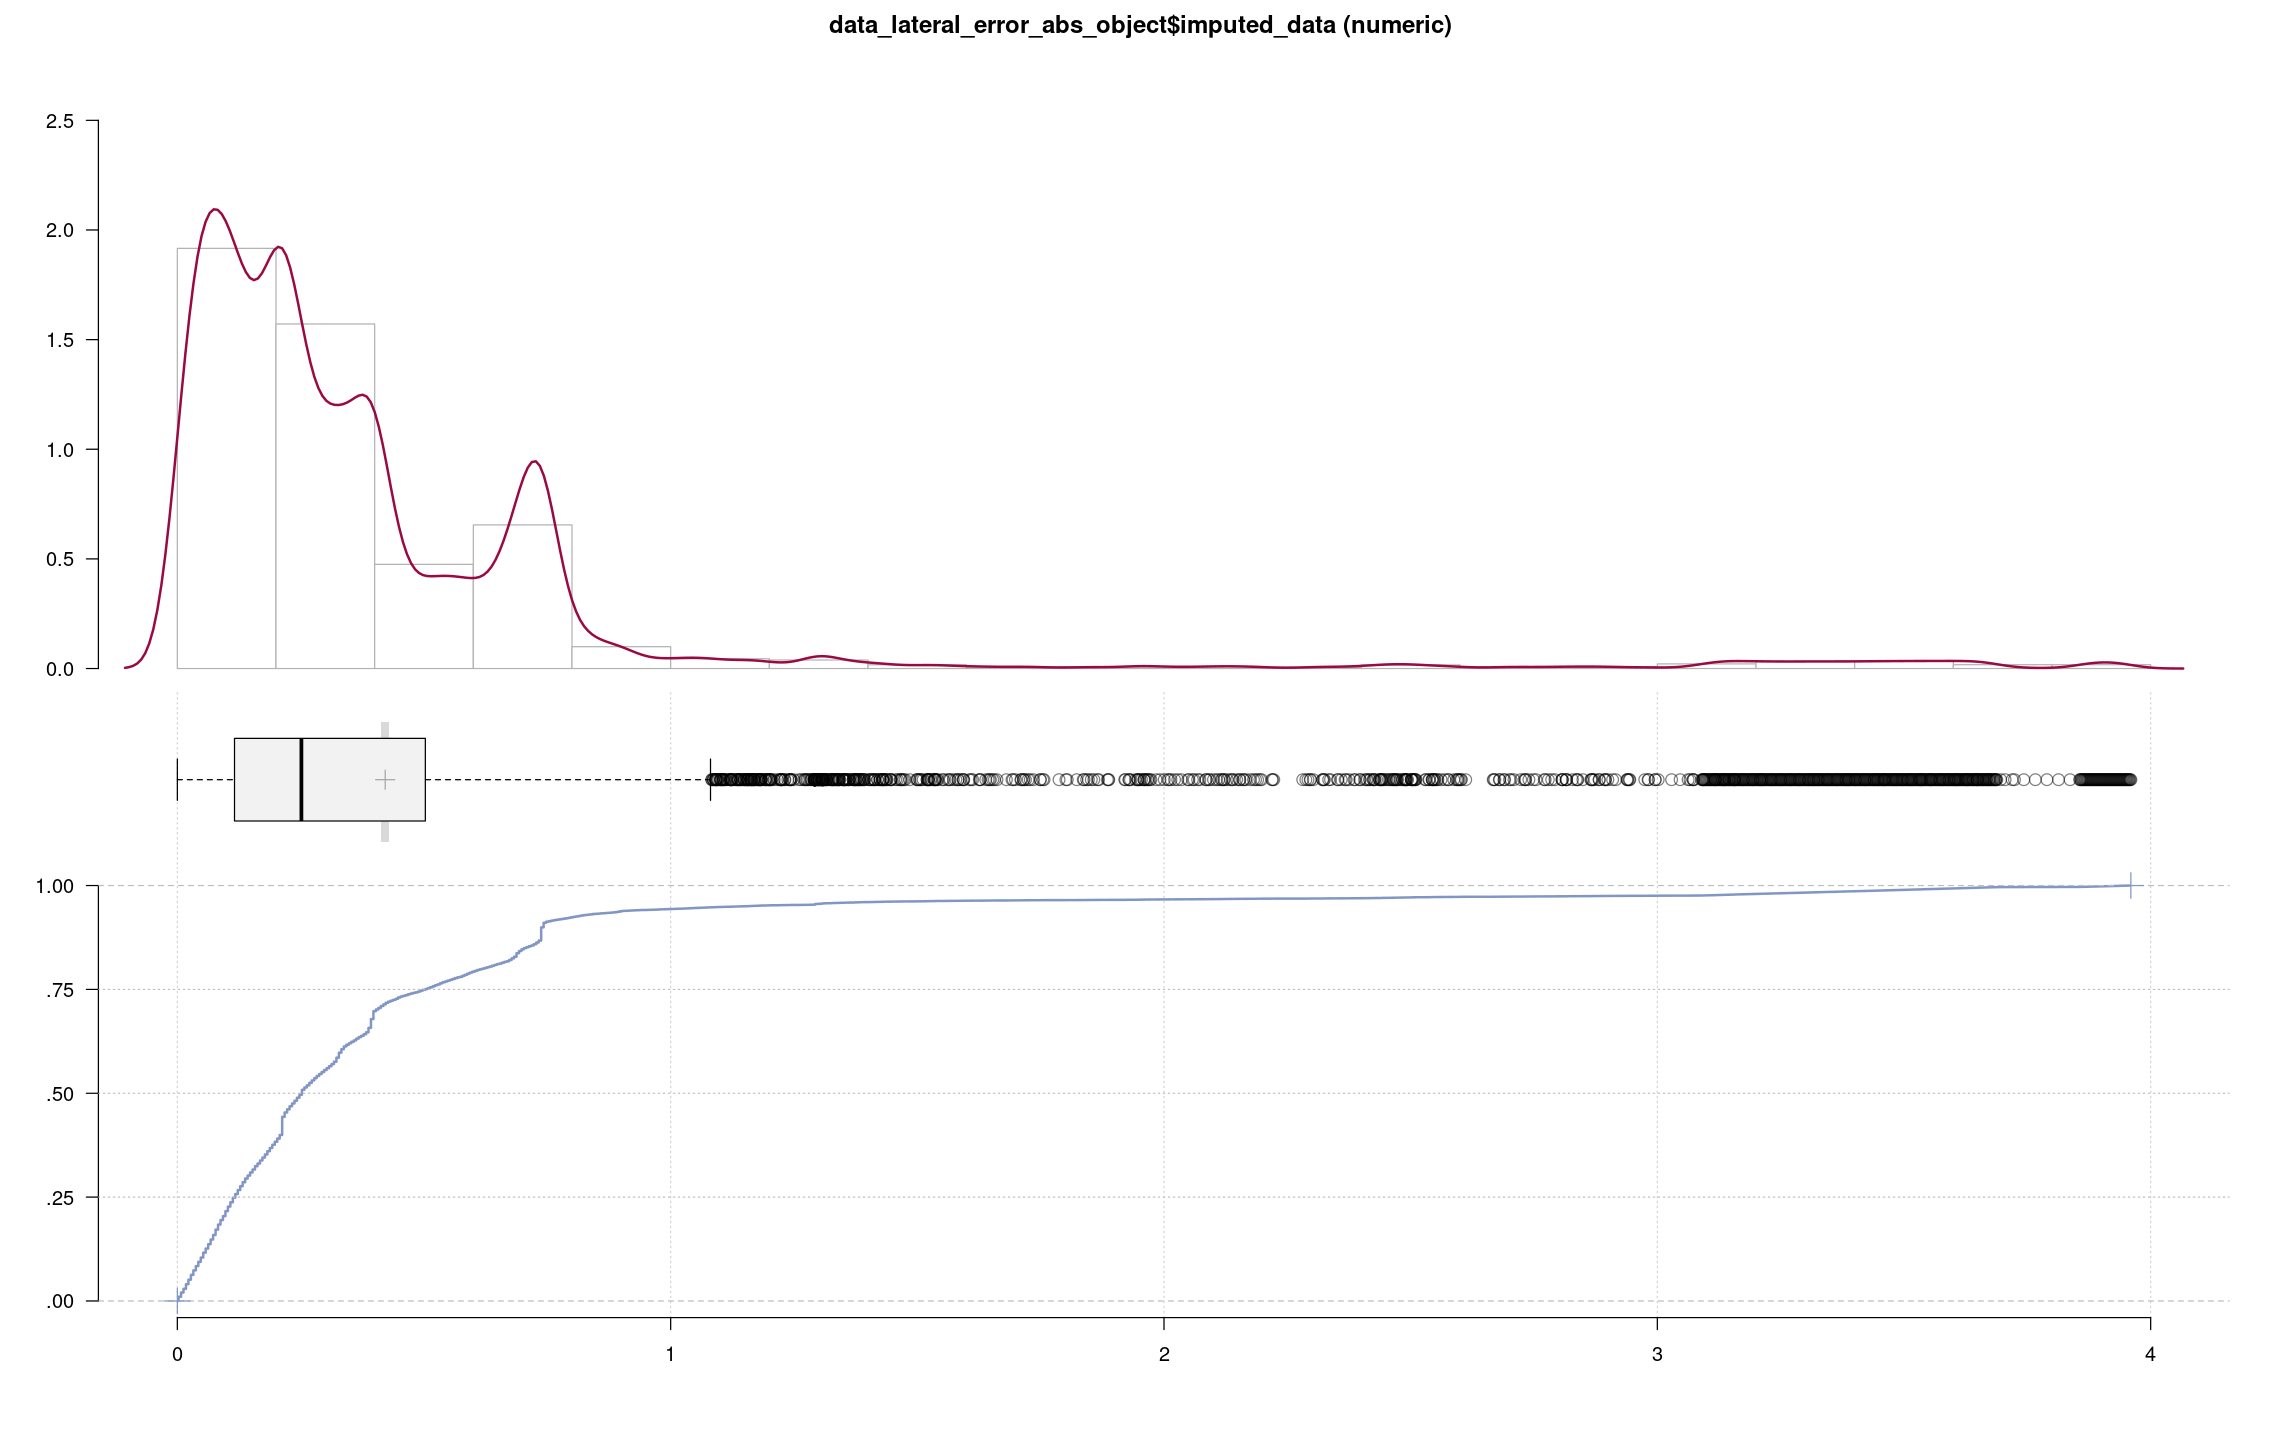

In [12]:
Desc(data_lateral_error_abs_object$imputed_data)

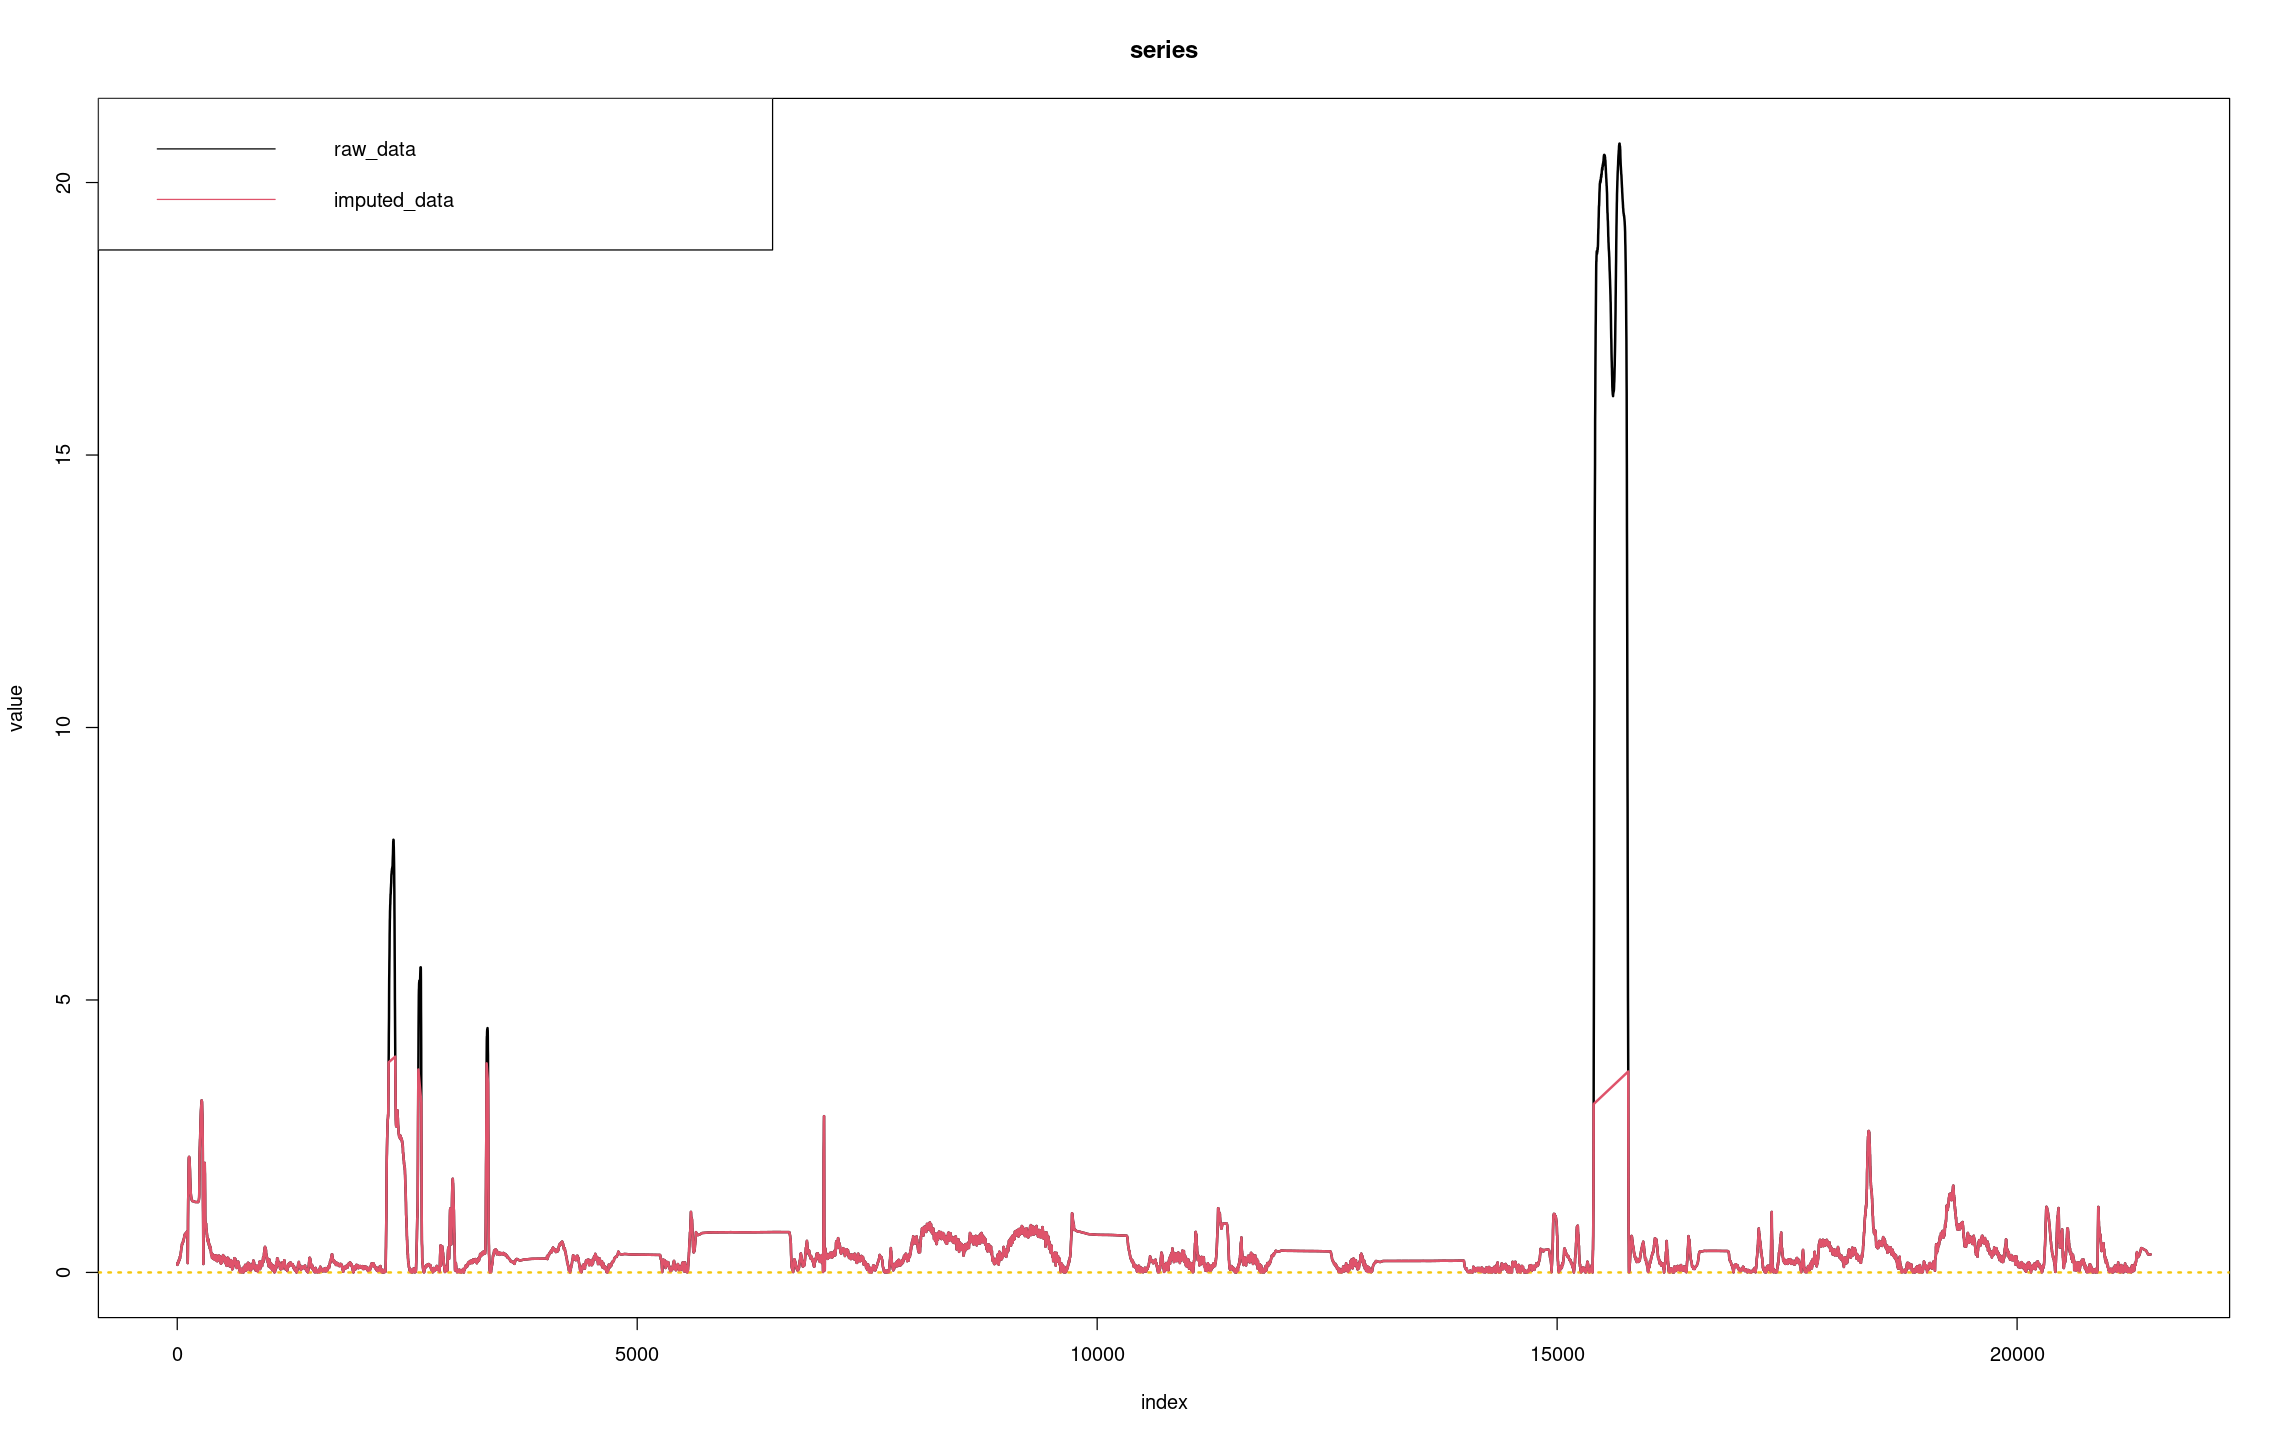

In [13]:
plot(data_lateral_error_abs_object$raw_data, 
     type = "l", 
     lwd = 2, 
     ylab = "value", 
     xlab = "index",
     main = "series")
abline(h = 0, lty = "dotted", col = 7, lwd = 2)
lines(data_lateral_error_abs_object$imputed_data, col = 2, lwd = 2)
legend("topleft", legend = c("raw_data", "imputed_data"), col = c(1, 2), lty = 1:1, cex = 1)

## longitudinal_error_abs

In [14]:
data_longitudinal_error_abs_object <- impute_outliers(x = data$longitudinal_error_abs, 
                                             coefficient_iqr = coefficient_iqr, 
                                             method = method)

In [15]:
print(names(data_longitudinal_error_abs_object))

[1] "outlier_values"      "outlier_positions"   "outlier_substitutes"
[4] "method"              "coefficient_iqr"     "imputed_data"       
[7] "raw_data"           


In [16]:
print(data_longitudinal_error_abs_object$outlier_positions)

  [1]  109  110  111  112  113  114  115  116  117  118  119  120  121  122  123
 [16]  124  125  126  127  128  129  130  131  132  133  134  135  136  137  138
 [31]  139  140  141  142  143  144  145  146  147  148  149  150  151  152  153
 [46]  154  155  156  157  158  159  160  161  162  163  164  165  166  167  168
 [61]  169  170  171  172  173  174  175  176  177  178  179  180  181  182  183
 [76]  184  185  186  187  188  189  190  191  192  193  194  195  196  197  198
 [91]  199  200  201  202  203  204  205  206  207  208  209  210  211  212  213
[106]  214  215  216  217  218  219  220  221  222  223  224  225  226  227  228
[121]  229  230  231  232  233  234  235  236  237  238  239  240  241  242  243
[136]  244  245  246  247  248  249  250  251  252  253  254  255  256  257  258
[151]  259  260  261  262  263  264  265  266  267  268  269  270  271  272  273
[166]  274  275  276  277  278  279  280  281  282  283  284  285  286  287  288
[181]  289  290  291  292  2

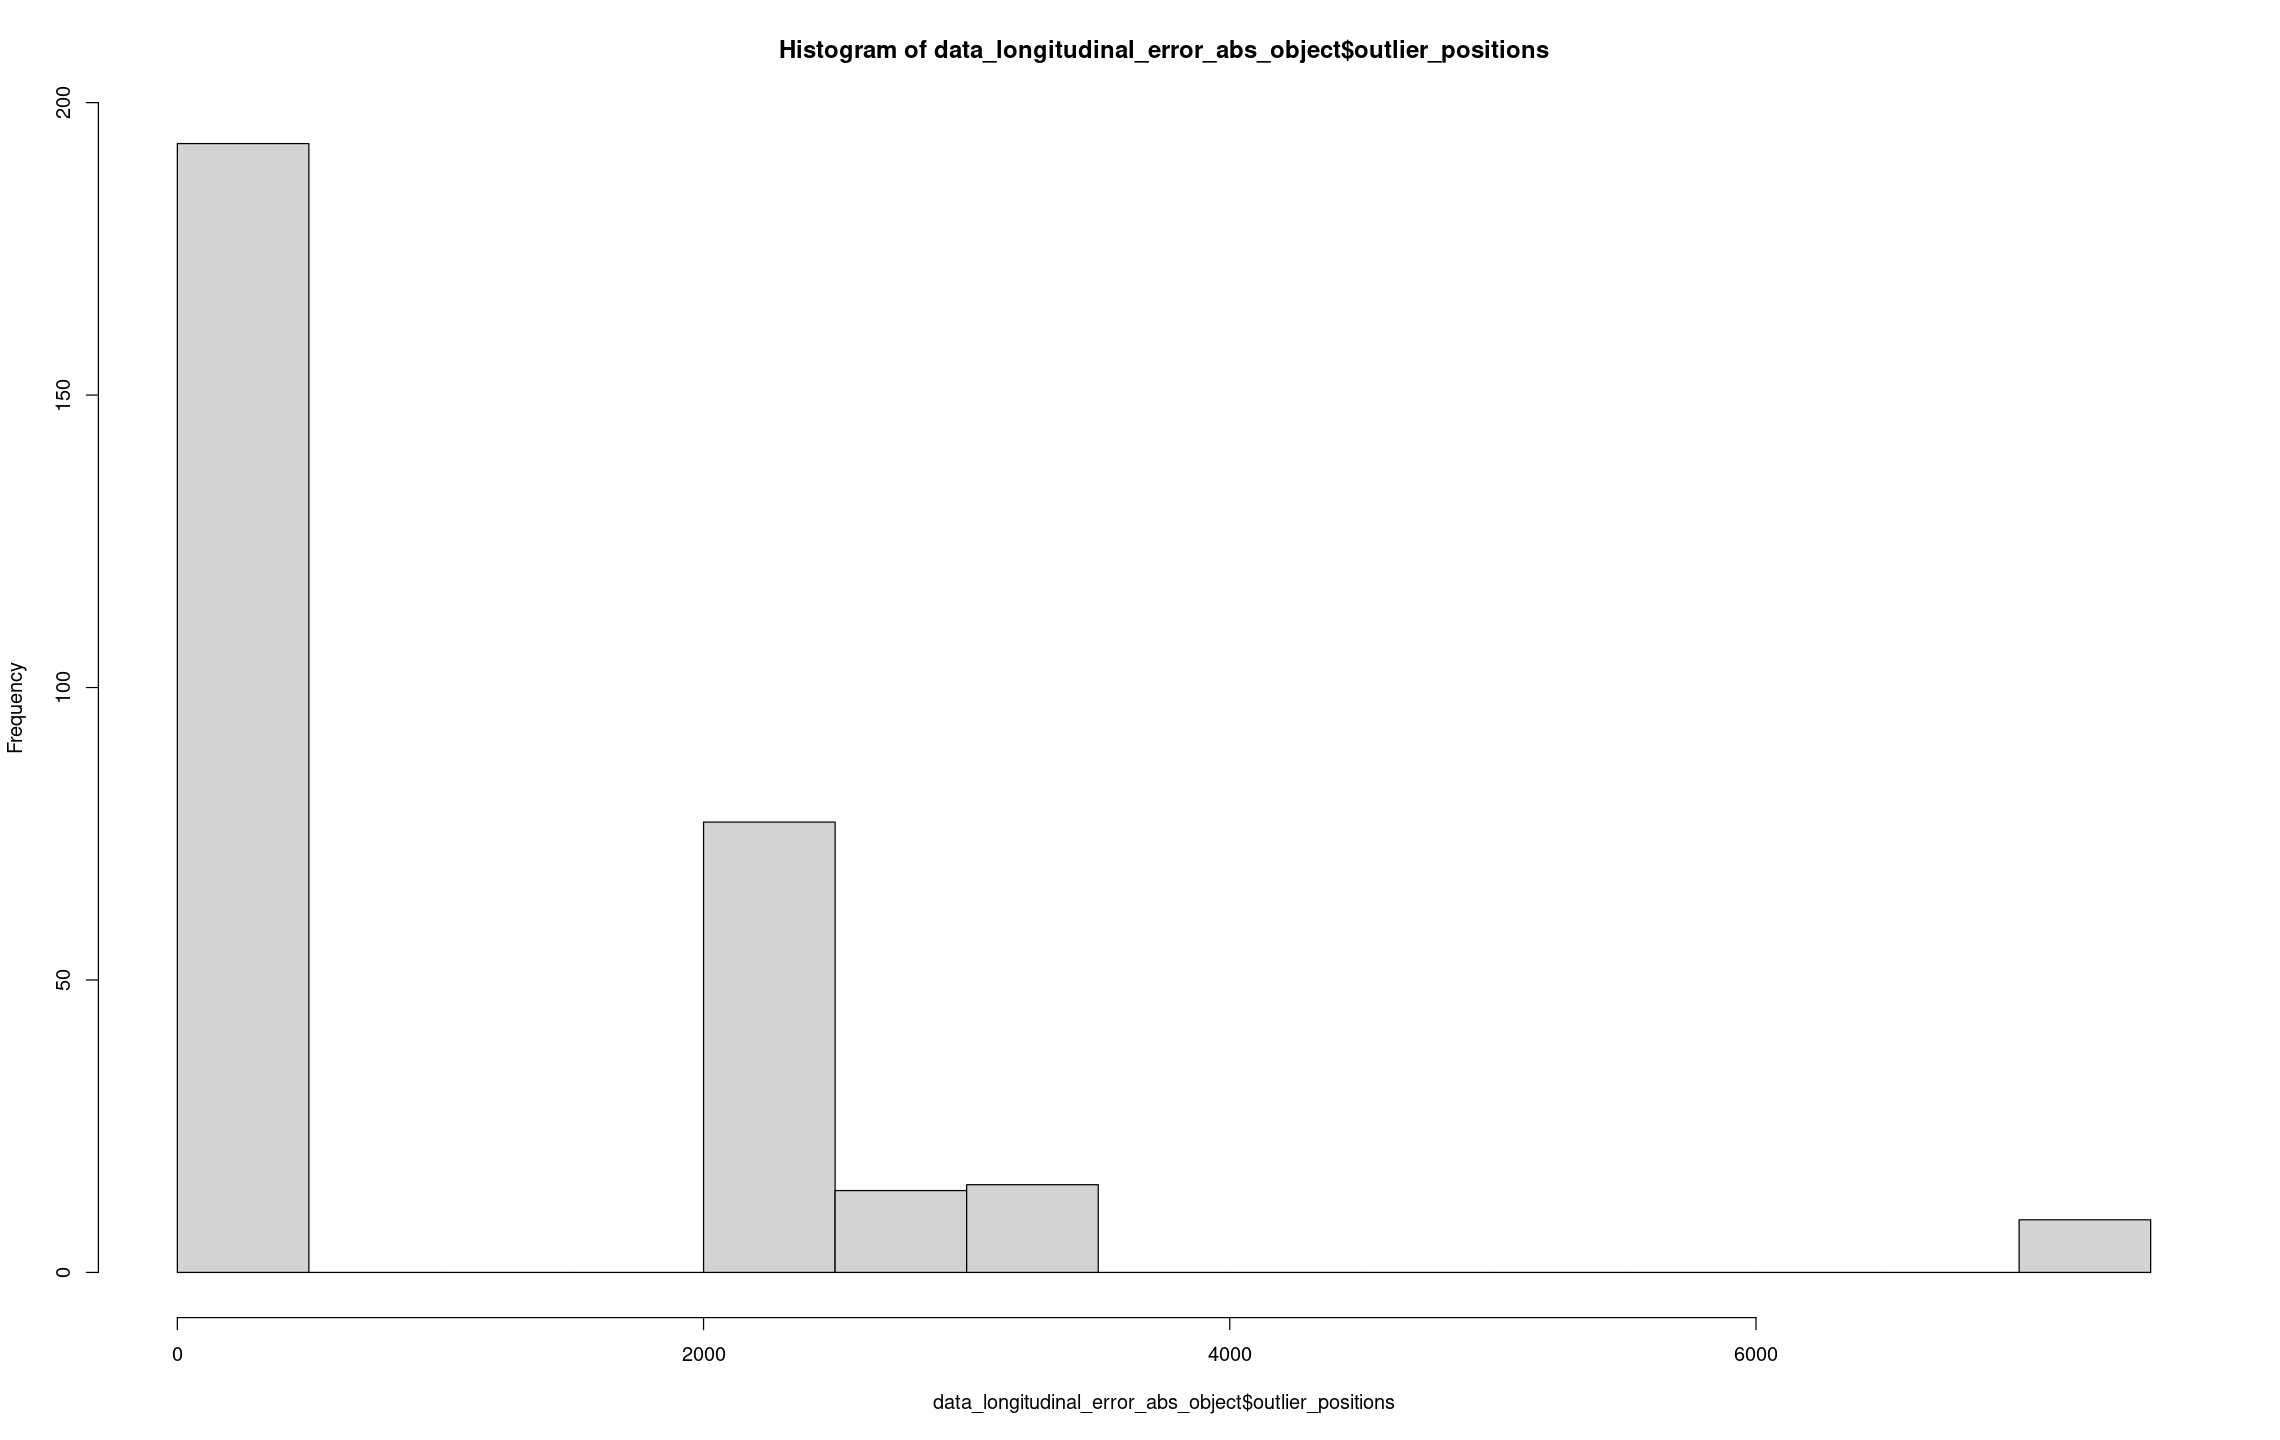

In [21]:
hist(data_longitudinal_error_abs_object$outlier_positions, nclass = 20)

------------------------------------------------------------------------------ 
data_longitudinal_error_abs_object$imputed_data (numeric)

        length             n           NAs        unique            0s'
        21'452        21'452             0        20'815             0
                      100.0%          0.0%                        0.0%
                                                                      
           .05           .10           .25        median           .75
  0.0055352795  0.0115877689  0.0443056384  0.1001653448  0.2002292387
                                                                      
         range            sd         vcoef           mad           IQR
  1.6024236845  0.2095666698  1.3604620142  0.0990403755  0.1559236003
                                                                      
          mean         meanCI
  0.1540408094   0.1512362740
                 0.1568453447
                             
           .90            .95


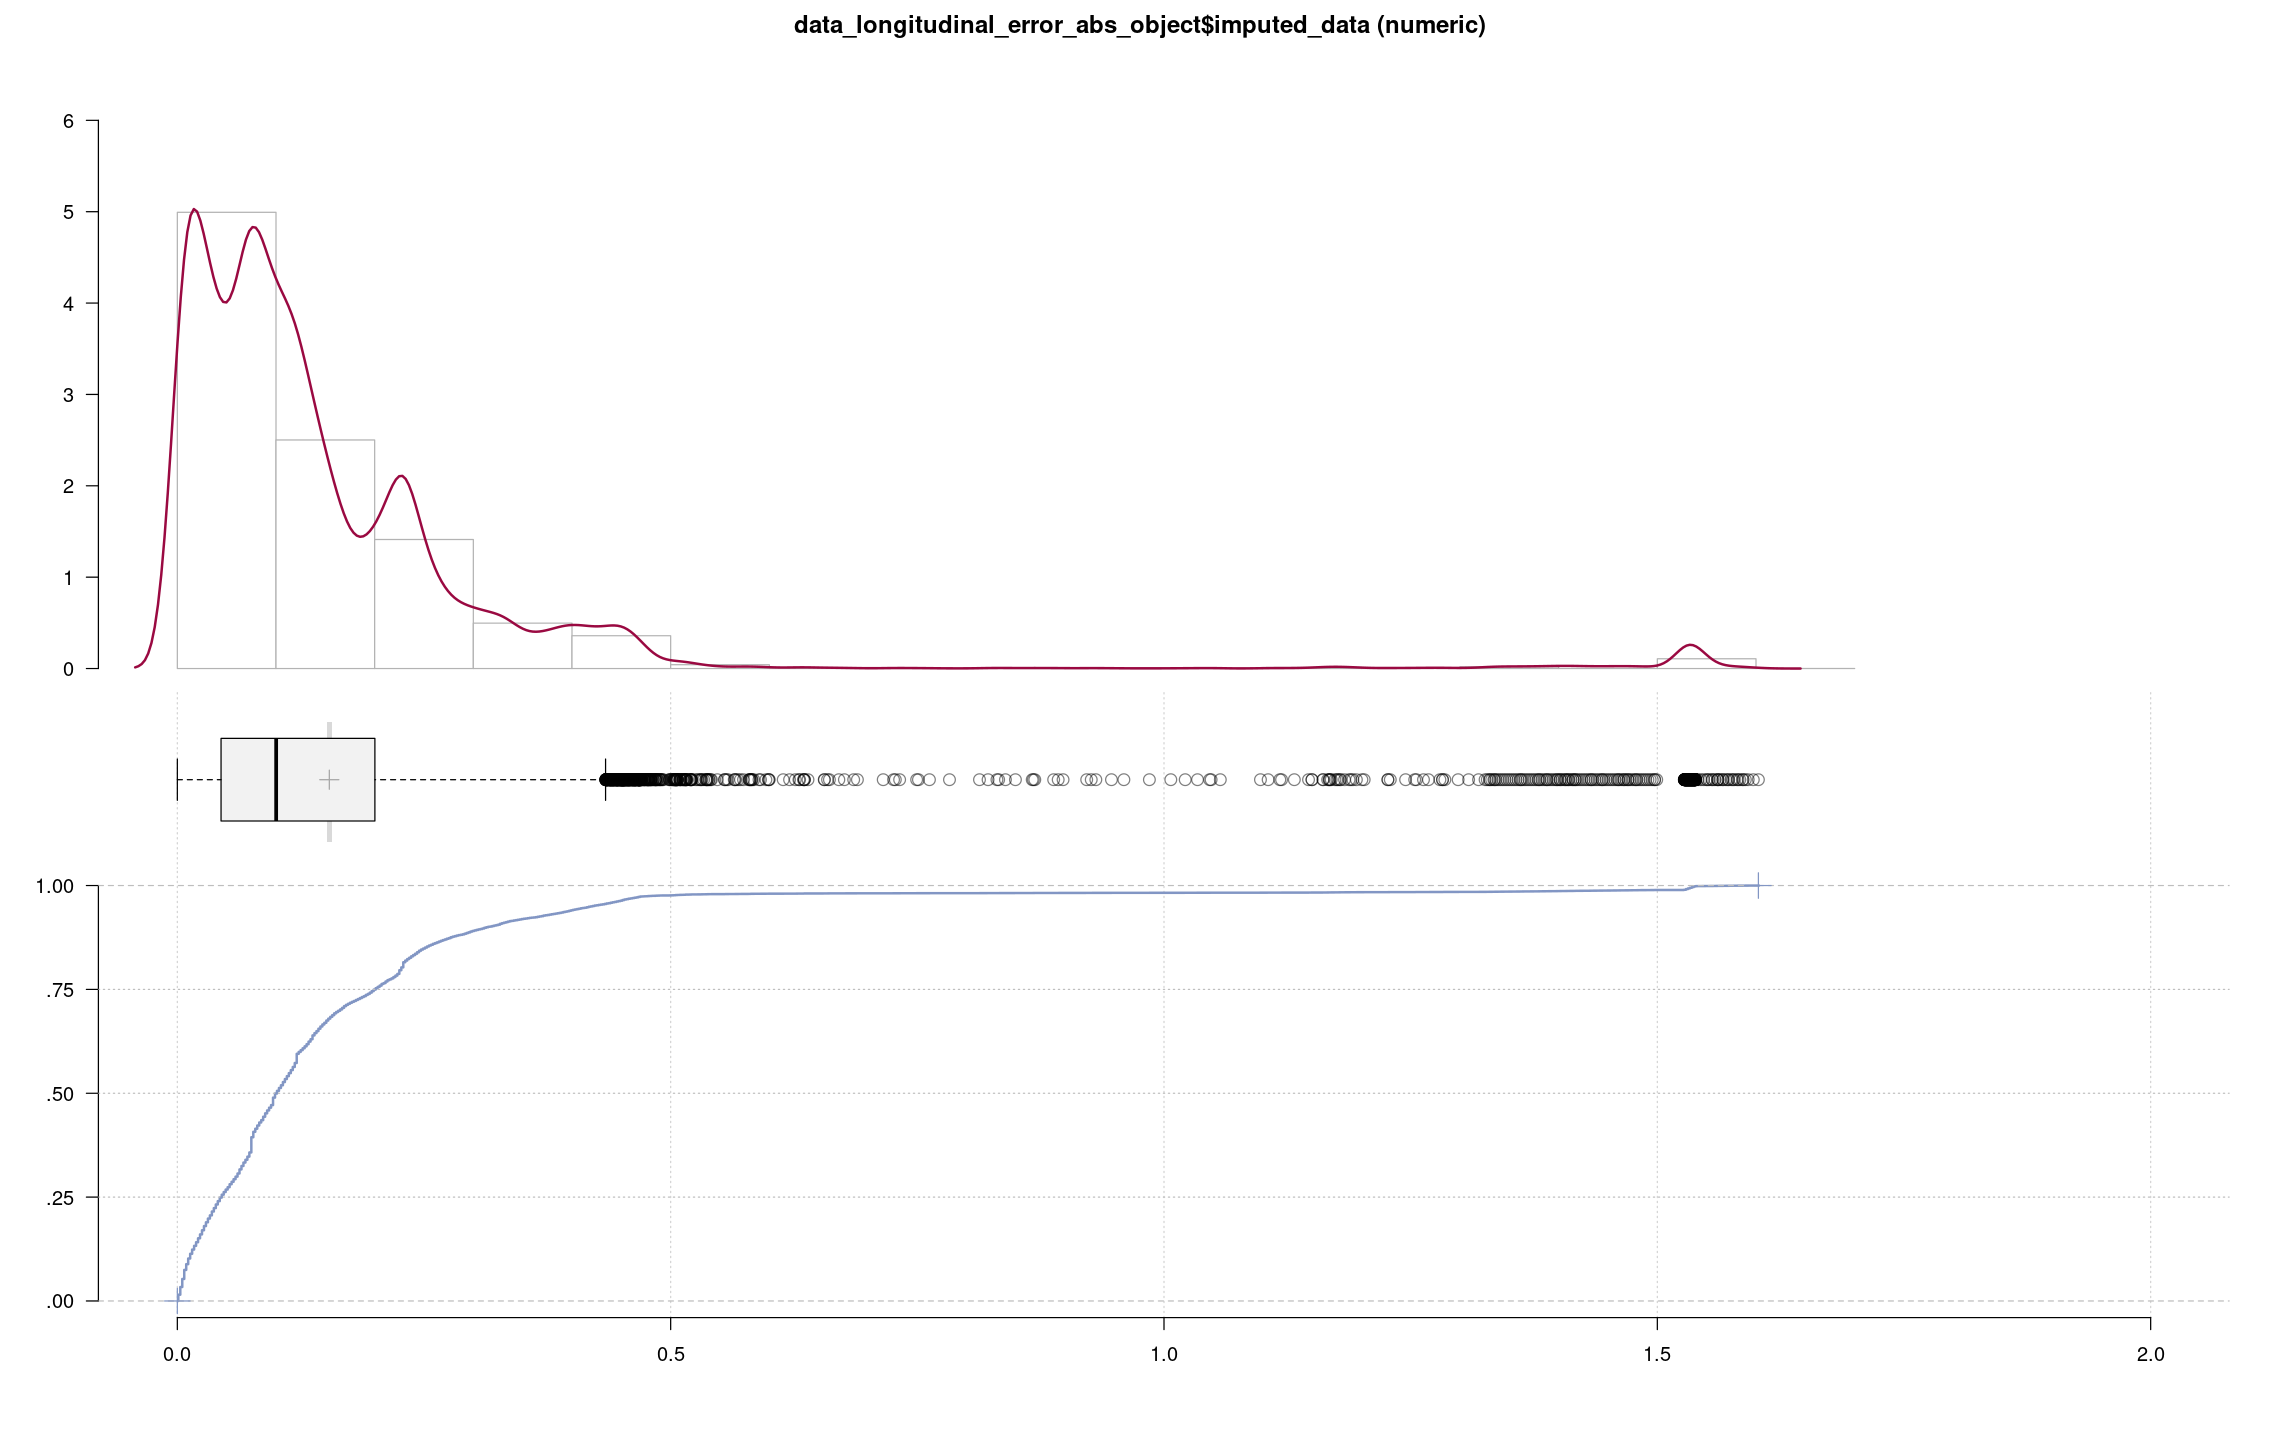

In [22]:
Desc(data_longitudinal_error_abs_object$imputed_data)

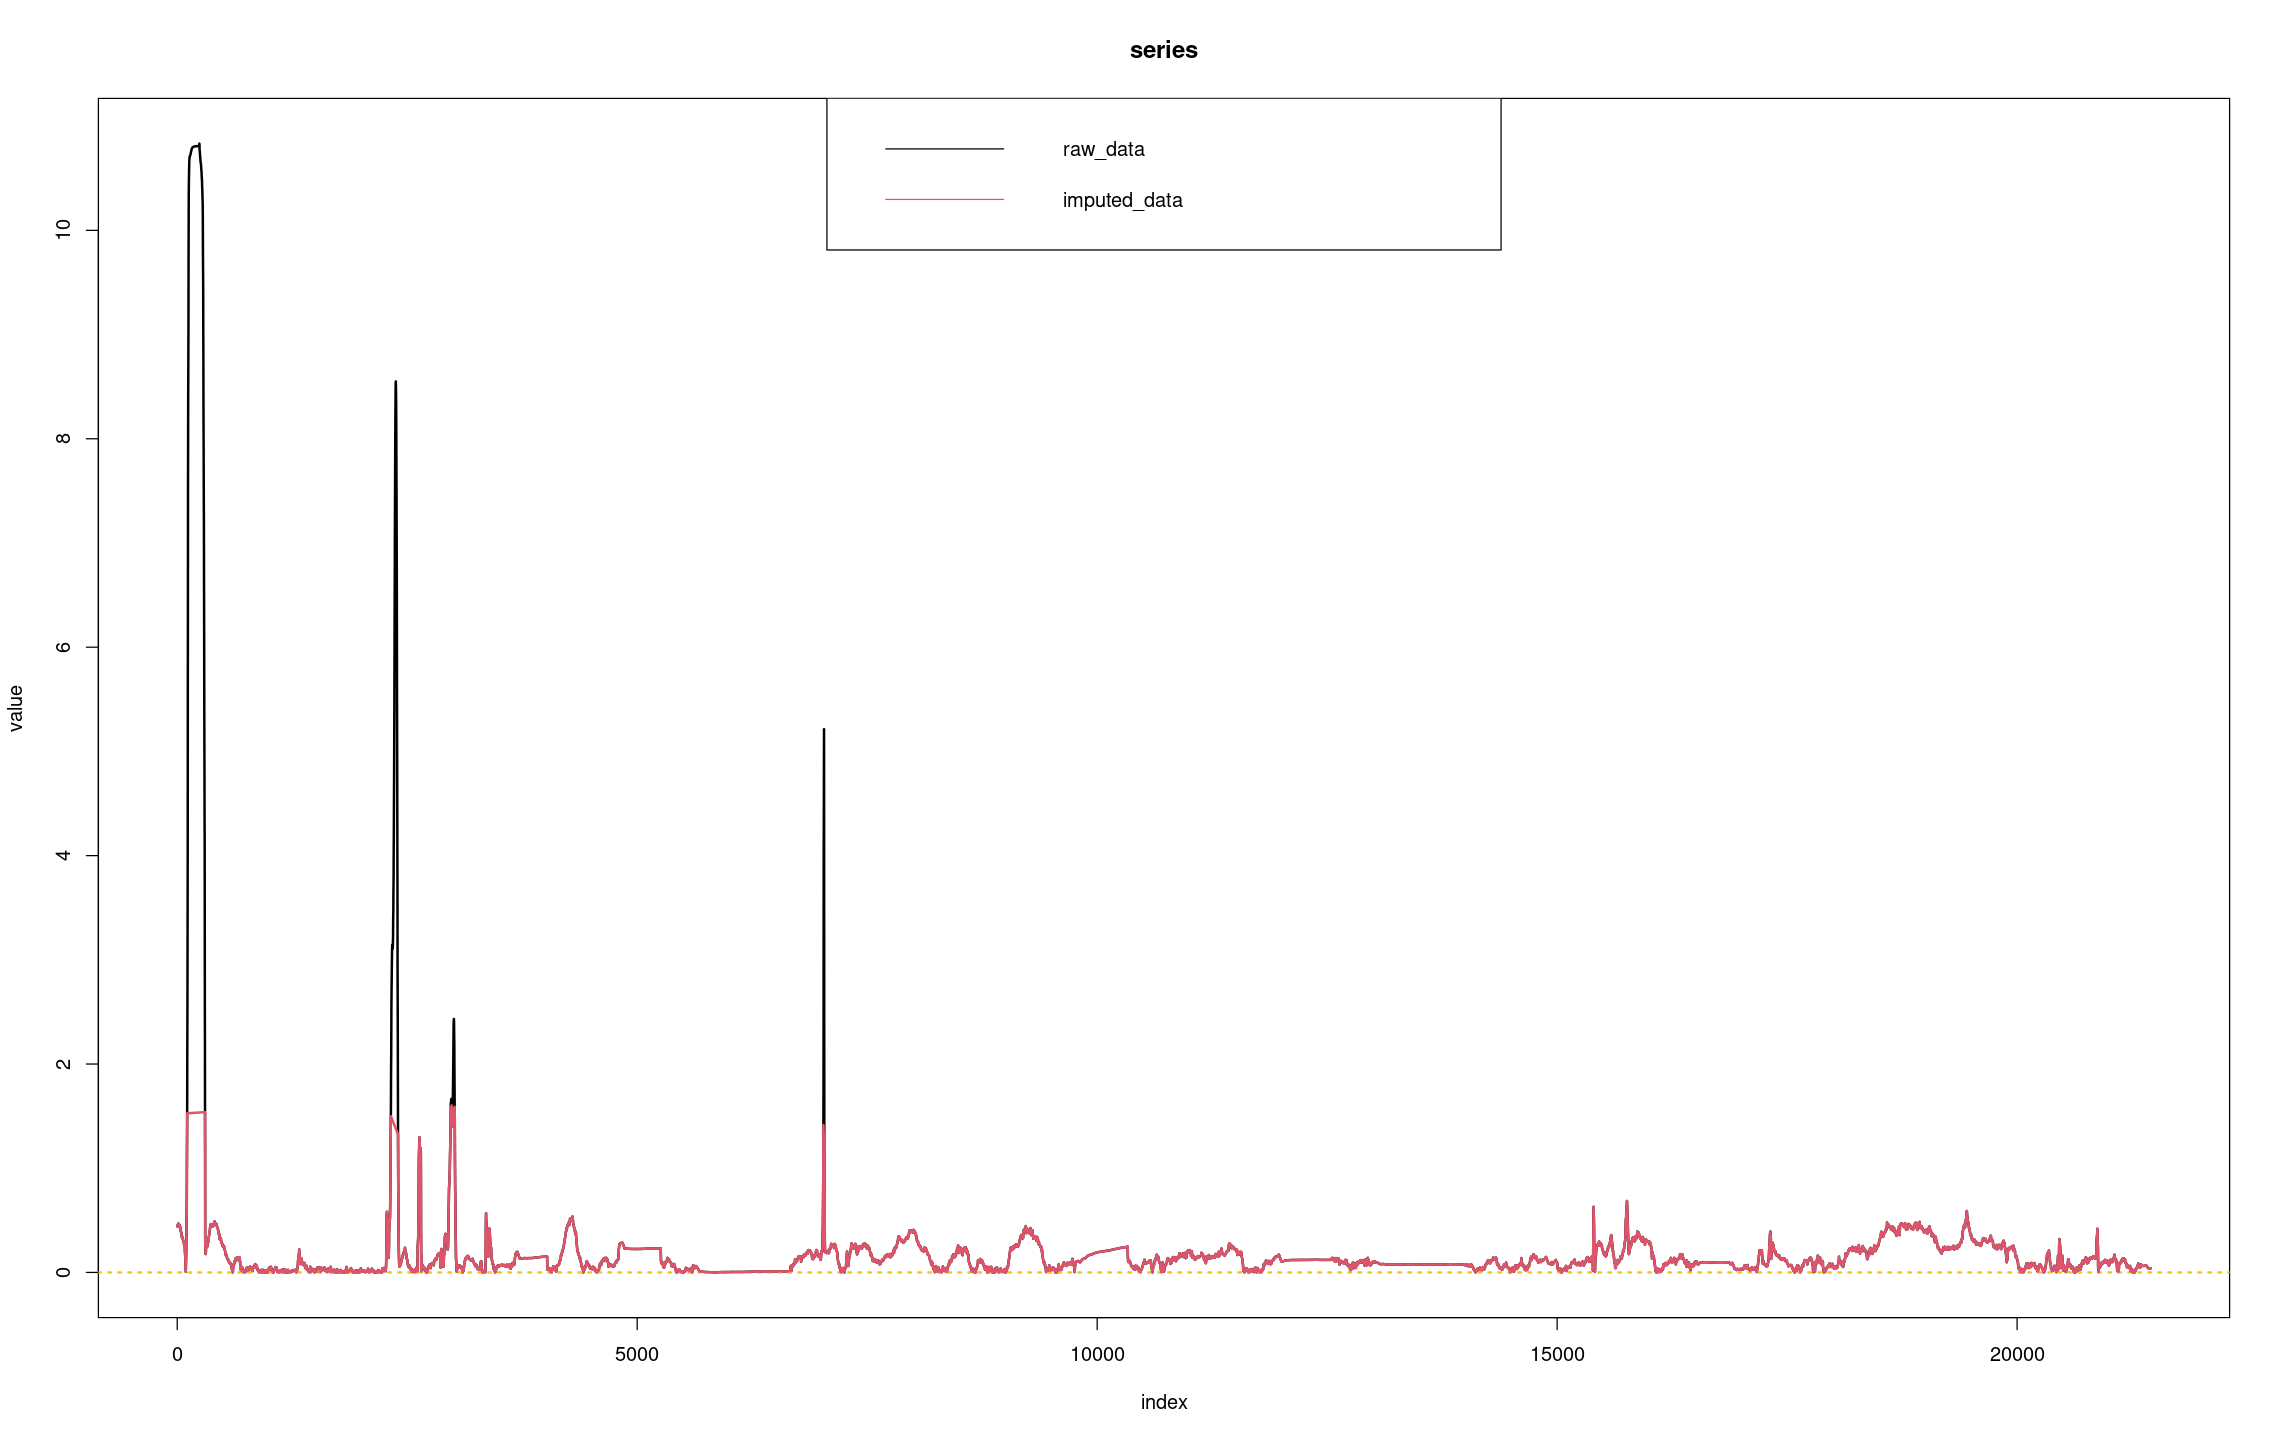

In [23]:
plot(data_longitudinal_error_abs_object$raw_data, 
     type = "l", 
     lwd = 2, 
     ylab = "value", 
     xlab = "index",
     main = "series")
abline(h = 0, lty = "dotted", col = 7, lwd = 2)
lines(data_longitudinal_error_abs_object$imputed_data, col = 2, lwd = 2)
legend("top", legend = c("raw_data", "imputed_data"), col = c(1, 2), lty = 1:1, cex = 1)
